In [9]:
%cd drive/My Drive/unet_Internship

[Errno 2] No such file or directory: 'drive/My Drive/unet_Internship'
/content/drive/.shortcut-targets-by-id/1s6lpL5MKRiJyMXxzpGp8e0tFbdUfamU2/unet_Internship


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%tensorflow_version 1.x
from model import *
from data import *
from figure_plot import *

TensorFlow 1.x selected.


Using TensorFlow backend.


In [11]:
X,y=preprocessing()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1,random_state=42)

No. of images =  54
['A_10.png', 'A_11.png', 'A_12.png', 'A_1.png', 'A_13.png', 'A_18.png', 'A_21.png', 'A_14.png', 'A_15.png', 'A_16.png', 'A_17.png', 'A_19.png', 'A_20.png', 'A_2.png', 'A_24.png', 'A_27.png', 'A_22.png', 'A_25.png', 'A_23.png', 'A_28.png', 'A_29.png', 'A_3.png', 'A_30.png', 'A_31.png', 'A_32.png', 'A_39.png', 'A_33.png', 'A_35.png', 'A_34.png', 'A_36.png', 'A_38.png', 'A_37.png', 'A_4.png', 'A_40.png', 'A_43.png', 'A_44.png', 'A_45.png', 'A_41.png', 'A_48.png', 'A_46.png', 'A_42.png', 'A_47.png', 'A_50.png', 'A_6.png', 'A_5.png', 'A_7.png', 'A_52.png', 'A_51.png', 'A_53.png', 'A_54.png', 'A_56.png', 'A_55.png', 'A_8.png', 'A_9.png']


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
im_width = 512
im_height = 512
border = 5

In [13]:
input_img = Input((im_height, im_width, 1), name='img')
model = unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False), loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
callbacks3 = [
    ModelCheckpoint('b3.h5', verbose=1, save_best_only=True, save_weights_only=True)
]
results3 = model.fit(X_train, y_train, batch_size=4, epochs=40, callbacks=callbacks3,\
                    validation_data=(X_valid, y_valid))


Train on 48 samples, validate on 6 samples
Epoch 1/40
48/48 [==============================] - 4s 77ms/step - loss: 0.7841 - accuracy: 0.4597 - val_loss: 0.6964 - val_accuracy: 0.5024

Epoch 00001: val_loss improved from inf to 0.69642, saving model to b3.h5
Epoch 2/40
48/48 [==============================] - 2s 41ms/step - loss: 0.7473 - accuracy: 0.4973 - val_loss: 0.6858 - val_accuracy: 0.5484

Epoch 00002: val_loss improved from 0.69642 to 0.68575, saving model to b3.h5
Epoch 3/40
48/48 [==============================] - 2s 39ms/step - loss: 0.7137 - accuracy: 0.5415 - val_loss: 0.6770 - val_accuracy: 0.5952

Epoch 00003: val_loss improved from 0.68575 to 0.67700, saving model to b3.h5
Epoch 4/40
48/48 [==============================] - 2s 40ms/step - loss: 0.6851 - accuracy: 0.5743 - val_loss: 0.6704 - val_accuracy: 0.6105

Epoch 00004: val_loss improved from 0.67700 to 0.67037, saving model to b3.h5
Epoch 5/40
48/48 [==============================] - 2s 40ms/step - loss: 0.6511 -

In [14]:
model.load_weights('b3.h5')
preds_val = model.predict(X_valid, verbose=1)
preds_val1 = (preds_val > 0.5).astype(int)
y_valid1=(y_valid > 0.5).astype(int)
intersection = np.logical_and(y_valid1, preds_val1)
union = np.logical_or(y_valid1, preds_val1)
mean_iou=intersection.sum()/union.sum()
print(mean_iou)


6/6 [==============================] - 8s 1s/step
0.5386780214581139


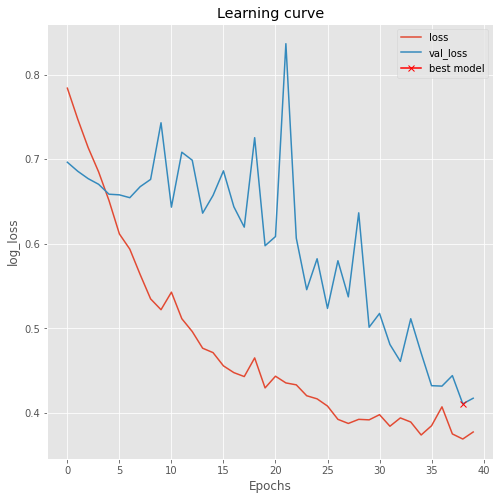

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results3.history["loss"], label="loss")
plt.plot(results3.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results3.history["val_loss"]), np.min(results3.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

The results of Figure plotted is succesfuly saved in results folder


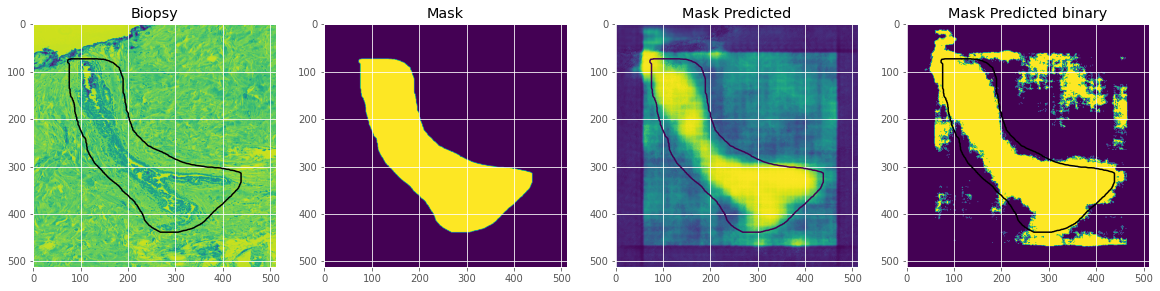

In [15]:
plot_sample(X_valid, y_valid, preds_val, preds_val1, ix=0)